# Modeling - Titanic Challenge

In [1]:
# instalamos la librería de kaggle API
!pip install kaggle -q # -q sería quiet es decir que no deja rastro de lo que instala...a veces es útil ocultarlo

In [2]:
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/ # en caso de Google Colab 
!ls ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/kaggle.json': No such file or directory
kaggle.json


In [3]:
!chmod 600 ~/.kaggle/kaggle.json # directorio que apunta a la raíz en Docker

In [4]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


## Cargamos las librerías


In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## 5. Model, predict and solve the problem.
### 5.1 Modelos de clasificación standalone
### 5.2 Modelos de clasificación con CV (Cross Validation)
#### 5.2.1 - K-fold Cross Validation
#### **5.2.2 - Ajustes de parámetros del CV**
#### 5.2.3 - Ajuste de Hyperparámetros (modelos ensemble)

## 5.2.1 - k-fold Cross Validation

K-Folds cross-validator
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=k%20fold#sklearn.model_selection.KFold

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

### - Validation Set

Al entrenar un modelo, el uso de diferentes parámetros puede conducir a una solución muy diferente. Con el fin de evitar de minimizar el error, que no siempre es un buen punto de partida, creamos una solución de **conjunto de validación**, que nos sirve para validar la selección de parámetros. Difiere del **conjunto de prueba o test** que este sirve solo para validar la calidad del modelo.

![](https://miro.medium.com/max/1552/1*Nv2NNALuokZEcV6hYEHdGA.png)

In [6]:
# Cargamos training y testing dataset (previamente preparados)
df_test = pd.read_csv("testingDF.csv")
df_test.head(5)

,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,Fare_Per_Person,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0.8419,0,2.178064,-0.5583,1,False,-0.0,0.6862,1.4286,-0.1562,...,1,0,0,0,0,0,0,0,0,1
1,0.8419,1,2.079442,0.0734,0,False,-0.0,-0.9323,2.4026,-1.0623,...,1,0,1,0,0,0,0,0,0,0
2,-0.3521,0,2.369075,-0.5583,1,False,-0.0,0.6862,1.9611,0.0624,...,1,0,0,0,0,1,0,0,0,0
3,0.8419,0,2.268252,-0.5583,1,False,-0.0,0.6862,0.8443,-0.0530,...,1,0,0,0,0,0,0,0,0,1
4,0.8419,1,2.586824,0.7051,0,False,-0.0,-0.9323,0.4547,-1.1686,...,1,0,0,0,0,0,1,0,0,0


In [7]:
df_train = pd.read_csv("trainDF.csv")
df_train.head(5)

,Pclass,Sex,Fare,FamilySize,IsAlone,InCabin,Room,Title,Age*Class,Fare_Per_Person,...,Deck_N,Deck_T,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Student,AgeGroup_Teenager,AgeGroup_Unknown,AgeGroup_Young Adult
0,0.8419,0,2.110213,0.0734,0,False,-0.0000,0.6862,0.4547,-1.0388,...,1,0,0,0,0,0,1,0,0,0
1,-1.5461,1,4.280593,0.0734,0,True,2.2175,-0.9323,-0.2725,0.6170,...,0,0,1,0,0,0,0,0,0,0
2,0.8419,1,2.188856,-0.5583,1,False,-0.0000,-0.9323,0.7664,-0.1439,...,1,0,0,0,0,0,0,0,0,1
3,-1.5461,1,3.990834,0.0734,0,True,4.5990,-0.9323,-0.3504,0.3959,...,0,0,0,0,0,0,0,0,0,1
4,0.8419,0,2.202765,-0.5583,1,False,-0.0000,0.6862,1.4676,-0.1279,...,1,0,0,0,0,0,0,0,0,1


In [8]:
# Se importa el train.csv solo para extraer la variable dep. Survived
y = pd.read_csv("train.csv")
y_train = y['Survived']
y_train.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
# guardamos las IDS de los pasajeros de testing para la submission con las predicciones
test = pd.read_csv("test.csv")
ids = test['PassengerId']
ids.head(5)

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [10]:
# Para poder validar correctamente el modelo aplicamos un 80/20 a mi fichero de training
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, 
                                                    test_size=0.20,
                                                   random_state=666)

In [11]:
# Para validar los parámetros del modelo realizamos un split validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.20,
                                                 random_state=666)

In [12]:
X_train.shape

(569, 35)

In [13]:
X_val.shape

(143, 35)

In [14]:
y_train.shape

(569,)

In [15]:
y_val.shape

(143,)

In [16]:
## PARTE 2 n_jobs = 10 // n_splits=10
# Realizamos la iteración Cross Validation con Kfold
K_fold = StratifiedKFold(n_splits=10)

# modelado con un estado random
random_state = 17

# Pasos para generar de forma conjunta un k-fold para diferentes estimadores
models = []
cv_results = []
cv_means = []
cv_std = []

# Parte II
# generamos los modelos con los estimadores confjgurando los valores por defecto
models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state=random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


# Realizamos una iteración con el cross_val
for model in models:
    cv_results.append(cross_val_score(model, X_train, y_train,
                                     scoring='accuracy',
                                     cv = K_fold,
                                     n_jobs = 10,
                                     verbose = 2))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    5.3s remaining:   12.4s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    8.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    1.2s remaining:    2.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    1.6s remaining:    3.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parall

In [17]:
# Iteramos los resultados del cross-validation (mean y std)
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [18]:
# Creamos un dataframe con los valores almacenados
cv_frame = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValErros": cv_std,
        "Algorithms":[
            "KNeighboors",
            "AdaBoost",
            "DecisionTree",
            "RandomForest",
            "ExtraTrees",
            "SVC",
            "GradientBoosting",
            "LogisticRegression",
            "LinearDiscriminantAnalysis",
            "MultipleLayerPerceptron"
        ]
    }
)

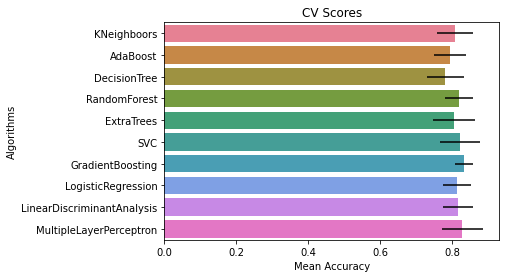

In [35]:
# Representamos estos valores del dataframe en un gráfico de barras
cv_plot = sns.barplot("CrossValMeans", "Algorithms", data = cv_frame,
                     palette="husl", orient='h', **{'xerr':cv_std})
cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

***

## 5.2.2 - Realizamos la tarea de micro-ajuste a los parámetros

***
`Logistic Regression`

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

In [19]:
# Linear Discriminant Analysis kfol=10
LR_Model= LogisticRegression()

LR_scores = cross_val_score(LR_Model, X_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

In [20]:
# Mostramos los resultados en pantalla
print(LR_scores)
round(np.mean(LR_scores)*100, 2)

[0.89473684 0.8245614  0.80701754 0.78947368 0.80701754 0.78947368
 0.77192982 0.85964912 0.75438596 0.82142857]


81.2

In [22]:
# Linear Discriminant Analysis kfol=15
LR_Model= LogisticRegression()

LR_scores15 = cross_val_score(LR_Model, X_train, y_train, cv = 15,
                       n_jobs = 4, scoring = 'accuracy')

In [23]:
# Mostramos los resultados en pantalla
print(LR_scores15)
round(np.mean(LR_scores15)*100, 2)

[0.86842105 0.92105263 0.84210526 0.89473684 0.68421053 0.78947368
 0.86842105 0.73684211 0.84210526 0.78947368 0.78947368 0.86842105
 0.73684211 0.81578947 0.78378378]


81.54

In [32]:
# Linear Discriminant Analysis kfol=25
LR_Model= LogisticRegression()

LR_scores25 = cross_val_score(LR_Model, X_train, y_train, cv = 25,
                       n_jobs = 4, scoring = 'accuracy')

In [33]:
# Mostramos los resultados en pantalla
print(LR_scores25)
round(np.mean(LR_scores25)*100, 2)

[0.95652174 0.82608696 0.91304348 0.82608696 0.7826087  0.86956522
 0.95652174 0.56521739 0.82608696 0.73913043 0.86956522 0.82608696
 0.73913043 0.82608696 0.7826087  0.86956522 0.7826087  0.7826087
 0.82608696 0.86363636 0.72727273 0.77272727 0.90909091 0.86363636
 0.72727273]


81.72

In [34]:
# Realizamos el tuneado de los parámetros del estimador LR
LR = LogisticRegression()

# Creamos una tarea de tuneado basado en grid
lr_param_grid = {
    # Creamos un grid con los parámetros a iterar, para ello necesitaremos realizar iteración de n valores por parámetros
              "penalty" : ['l1', 'l2', 'none'],
                "tol": [0.0001, 0.0002, 0.0003], # default value 0.0001
                "max_iter": [100,200,300], # default value 100
                "C" : [0.01, 0.1, 1, 10, 100],
                "intercept_scaling" : [1, 2, 3, 4],
            "solver" : ['liblinear'], # for small dataset liblinear is better
              "verbose": [1]
}


# Construimos nuestro modelo con estos parámetros con K-fold = 25
gsLR = GridSearchCV(LR, param_grid=lr_param_grid, cv=25,
                    scoring='accuracy', n_jobs=4, verbose=2)

# Aplicamos el ajuste
gsLR.fit(X_train, y_train)

# Extraemos el mejor estimador
LR_best = gsLR.best_estimator_

# Extraemos el mejor resultado
gsLR.best_score_

Fitting 25 folds for each of 4320 candidates, totalling 108000 fits
[LibLinear]

0.8225296442687747

In [35]:
# Observamos los mejores parámetro para este modelo
LR_best.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [36]:
gsLR.cv_results_

{'mean_fit_time': array([0.00435568, 0.00285215, 0.00520057, ..., 0.12212112, 0.0838555 ,
        0.10710249]),
 'std_fit_time': array([0.00433721, 0.0017946 , 0.00489238, ..., 0.01056502, 0.03535173,
        0.01496064]),
 'mean_score_time': array([0.        , 0.        , 0.        , ..., 0.00825173, 0.0055812 ,
        0.00733139]),
 'std_score_time': array([0.        , 0.        , 0.        , ..., 0.00406135, 0.00394813,
        0.00415415]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, ..., 1000, 1000, 1000],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_intercept_scaling': masked_array(data=[1, 1, 1, ..., 4, 4, 4],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100, 100, 100, ..., 1000, 1000, 1000],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?

## Aplicamos el resultado final del modelo obtenido y lo aplicamos primero al Validation y luego al Testing dataset

In [ ]:
# Aplicamos el modelo al validación
data_val = gsLDA.predict(<dataset de validación>)

In [56]:
X_val.shape # 143

(143, 35)

In [ ]:
df_test.shape #418

In [37]:
# Sucesivamente hay que aplicarlo al testing dataset
prediction = gsLR.predict(df_test)

In [38]:
# Los resultados de nuestro modelo aplicado al dataset de test 
submission = pd.DataFrame({
  'PassengerId' : ids,
    'Survived' : prediction
})

In [39]:
submission.to_csv('titanic_model.gsLR.csv', index=False)

In [40]:
submission.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [41]:
# Submission to Kaggle
!kaggle competitions submit titanic -f 'titanic_model.gsLR.csv' -m "Modelo ML utilizado tuning LR"

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 913B/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [42]:
!kaggle competitions submissions titanic

fileName                         date                 description                                                                                                                 status    publicScore  privateScore  
-------------------------------  -------------------  --------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
titanic_model.gsLR.csv           2021-03-13 11:30:48  Modelo ML utilizado tuning LR                                                                                               complete  0.77272      None          
titanic_model.gsLDA.csv          2021-03-13 09:36:24  Modelo ML utilizado tuning LDA                                                                                              complete  0.77272      None          
submission_SVC2.csv              2021-03-12 19:55:54  SVC 2                                                                             

In [67]:
!kaggle competitions leaderboard titanic -s

 teamId  teamName                   submissionDate       score    
-------  -------------------------  -------------------  -------  
6015697  Jizhou Wei                 2020-12-16 03:13:08  1.00000  
6023788  JaesikYang                 2020-12-17 00:11:13  1.00000  
4364147  Börkapanda                 2021-02-12 19:23:04  1.00000  
6027704  Eleven_Wang                2020-12-17 04:07:35  1.00000  
6030190  Ease Gao                   2020-12-17 13:16:29  1.00000  
5322915  Marcel Reis                2020-12-17 15:57:42  1.00000  
5919487  Test 1                     2020-12-17 17:09:30  1.00000  
5705094  Zeeshan Patel              2021-02-15 04:04:10  1.00000  
5795033  Swapnils007                2020-12-18 04:59:08  1.00000  
6036587  Rustin Shamloo             2020-12-18 15:54:41  1.00000  
3749547  Adeyinka Michael Sotunde   2020-12-19 20:11:29  1.00000  
5956259  RairiU                     2020-12-19 21:58:35  1.00000  
6039146  shivanjay wagh             2020-12-22 11:46:47  1.000

***

## Ajuste de parámetros de otros estimadores